# Introdução  

A ocupação de imóveis é influenciada por diversos fatores socioeconômicos e ambientais, tornando essencial a aplicação de técnicas de análise de dados para entender quais variáveis possuem maior impacto nesse contexto. Este projeto tem como objetivo aplicar técnicas estatísticas e de modelagem para responder à seguinte pergunta de negócio:  

**Quais fatores mais influenciam na taxa de ocupação de imóveis?**  

Para isso, utilizaremos um conjunto de dados que contém informações sobre características urbanas, infraestrutura, segurança, economia e qualidade de vida das regiões analisadas. O processo envolverá as seguintes etapas:  

- **Entendimento do negócio:** análise do contexto imobiliário e das variáveis disponíveis.  
- **Análise exploratória de dados (EDA):** investigação de padrões, correlações e possíveis inconsistências nos dados.  
- **Modelagem estatística:** aplicação da regressão linear para avaliar como cada variável impacta a taxa de ocupação dos imóveis.  
- **Validação do modelo:** testes estatísticos para verificar a conformidade com os princípios da regressão linear e a confiabilidade dos resultados.  

Com essa abordagem, é esperado fornecer insights valiosos sobre os fatores determinantes da taxa de ocupação de imóveis, contribuindo para melhores decisões no mercado imobiliário e em políticas urbanas.  


### Dicionário de Dados

| Nome da Variável                        | Significado |
|-----------------------------------------|------------|
| `numero_medio_quartos_por_residencia`  | Média de quartos por residência. |
| `idade_media_residencias`               | Idade média das residências. |
| `taxa_criminalidade`                    | Taxa de criminalidade na região. |
| `proporcao_lotes`                       | Proporção de terrenos residenciais. |
| `proporcao_empresas`                    | Proporção de estabelecimentos comerciais. |
| `rio_no_bairro`                         | Indica se há um rio no bairro (0 = Não, 1 = Sim). |
| `taxa_poluicao`                         | Índice de poluição na região. |
| `distancia_centro`                      | Distância média até o centro da cidade. |
| `index_acessibilidade`                   | Índice de acessibilidade ao transporte e rodovias. |
| `imposto_residencial`                   | Valor médio do imposto residencial. |
| `taxa_professores`                      | Proporção de professores por aluno. |
| `consumo_medio_energia`                 | Consumo médio de energia por residência. |
| `taxa_desabrigados`                     | Proporção de pessoas desabrigadas na região. |
| `taxa_ocupacao`                         | Percentual de residências ocupadas. |
| `taxa_ocupacao_log`                     | Logaritmo da taxa de ocupação das residências. |


In [110]:
import pandas as pd
import numpy as np

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem Estatística
import pylab
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
import statsmodels.stats.api as sms
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

#Divisao dos dados
from sklearn.model_selection import train_test_split

# Padronização dos dados
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [112]:
dicionario = {
    "Nome da Variável": [
        "numero_medio_quartos_por_residencia", "idade_media_residencias",
        "taxa_criminalidade", "proporcao_lotes", "proporcao_empresas",
        "rio_no_bairro", "taxa_poluicao", "distancia_centro",
        "index_acessibilidade", "imposto_residencial", "taxa_professores",
        "consumo_medio_energia", "taxa_desabrigados", "taxa_ocupacao",
        "taxa_ocupacao_log"
    ],
    "Tipo": [
        "Numérico", "Numérico", "Numérico", "Numérico", "Numérico",
        "Binário", "Numérico", "Numérico", "Numérico", "Numérico",
        "Numérico", "Numérico", "Numérico", "Numérico", "Numérico"
    ],
    "Descrição": [
        "Número médio de quartos por residência na região.",
        "Idade média das residências na região.",
        "Taxa de criminalidade na região (crimes por 1000 habitantes, por exemplo).",
        "Proporção de terrenos destinados a residências na região.",
        "Proporção de estabelecimentos comerciais na região.",
        "Indica se há um rio no bairro (0 = Não, 1 = Sim).",
        "Índice de poluição atmosférica na região.",
        "Distância média das residências até o centro da cidade (em km).",
        "Índice de acessibilidade ao transporte público e rodovias.",
        "Valor médio do imposto residencial na região.",
        "Proporção de professores por aluno nas escolas da região.",
        "Consumo médio de energia elétrica por residência na região.",
        "Proporção de pessoas desabrigadas na região.",
        "Taxa de ocupação das residências na região (percentual de casas ocupadas).",
        "Logaritmo da taxa de ocupação das residências, usado para modelagem estatística."
    ]
}

# Criando o DataFrame
df_dicionario = pd.DataFrame(dicionario)

In [113]:
df_dicionario

,Nome da Variável,Tipo,Descrição
0,numero_medio_quartos_por_residencia,Numérico,Número médio de quartos por residência na região.
1,idade_media_residencias,Numérico,Idade média das residências na região.
2,taxa_criminalidade,Numérico,Taxa de criminalidade na região (crimes por 10...
3,proporcao_lotes,Numérico,Proporção de terrenos destinados a residências...
4,proporcao_empresas,Numérico,Proporção de estabelecimentos comerciais na re...
5,rio_no_bairro,Binário,"Indica se há um rio no bairro (0 = Não, 1 = Sim)."
6,taxa_poluicao,Numérico,Índice de poluição atmosférica na região.
7,distancia_centro,Numérico,Distância média das residências até o centro d...
8,index_acessibilidade,Numérico,Índice de acessibilidade ao transporte público...
9,imposto_residencial,Numérico,Valor médio do imposto residencial na região.


In [5]:
dados = pd.read_csv('dataset.csv')

In [109]:
dados.columns

Index(['numero_medio_quartos_por_residencia', 'idade_media_residencias',
       'taxa_criminalidade', 'proporcao_lotes', 'proporcao_empresas',
       'rio_no_bairro', 'taxa_poluicao', 'distancia_centro',
       'index_acessibilidade', 'imposto_residencial', 'taxa_professores',
       'consumo_medio_energia', 'taxa_desabrigados', 'taxa_ocupacao',
       'taxa_ocupacao_log'],
      dtype='object')

In [6]:
dados.head()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
0,6.575,65.2,0.00634,18.0,2.31,0,0.538,4.0900,1,296,15.3,396.90,4.98,24.0
1,6.421,78.9,0.02731,0.0,7.07,0,0.469,4.9671,2,242,17.8,396.90,9.14,21.6
2,7.185,61.1,0.02729,0.0,7.07,0,0.469,4.9671,2,242,17.8,392.83,4.03,34.7
3,6.998,45.8,0.03237,0.0,2.18,0,0.458,6.0622,3,222,18.7,394.63,2.94,33.4
4,7.147,54.2,0.06905,0.0,2.18,0,0.458,6.0622,3,222,18.7,396.90,5.33,36.2


A taxa de ocupação das residências (variável taxa_ocupacao) é a variável alvo e o restante são as variáveis independentes com base nas quais vamos analisar a taxa de ocupação das casas dos bairros de uma determinada cidade.

Verificando quais variáveis preditoras devemos usar



In [7]:
# Criando uma cópia dos dados
dados_2 = dados.copy()

### Análise Exploratória de dados

In [8]:
dados.shape

(500, 14)

In [9]:
dados.dtypes

numero_medio_quartos_por_residencia    float64
idade_media_residencias                float64
taxa_criminalidade                     float64
proporcao_lotes                        float64
proporcao_empresas                     float64
rio_no_bairro                            int64
taxa_poluicao                          float64
distancia_centro                       float64
index_acessibilidade                     int64
imposto_residencial                      int64
taxa_professores                       float64
consumo_medio_energia                  float64
taxa_desabrigados                      float64
taxa_ocupacao                          float64
dtype: object

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   numero_medio_quartos_por_residencia  500 non-null    float64
 1   idade_media_residencias              500 non-null    float64
 2   taxa_criminalidade                   500 non-null    float64
 3   proporcao_lotes                      500 non-null    float64
 4   proporcao_empresas                   500 non-null    float64
 5   rio_no_bairro                        500 non-null    int64  
 6   taxa_poluicao                        500 non-null    float64
 7   distancia_centro                     500 non-null    float64
 8   index_acessibilidade                 500 non-null    int64  
 9   imposto_residencial                  500 non-null    int64  
 10  taxa_professores                     500 non-null    float64
 11  consumo_medio_energia           

In [11]:
dados.nunique()

numero_medio_quartos_por_residencia    442
idade_media_residencias                353
taxa_criminalidade                     498
proporcao_lotes                         26
proporcao_empresas                      75
rio_no_bairro                            2
taxa_poluicao                           80
distancia_centro                       406
index_acessibilidade                     9
imposto_residencial                     65
taxa_professores                        46
consumo_medio_energia                  356
taxa_desabrigados                      449
taxa_ocupacao                          229
dtype: int64

Análise:

* Há um total de 500 observações não nulas em cada uma das colunas. Isso indica que não há valores ausentes nos dados
* Cada coluna neste conjunto de dados é de natureza numérica

In [12]:
# Resumo estatístico
dados.describe()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,6.282970,68.424600,3.655786,11.500000,11.131740,0.070000,0.554451,3.811932,9.642000,409.624000,18.428600,356.208040,12.698740,22.568000
std,0.705421,28.272145,8.644375,23.428739,6.900712,0.255403,0.116550,2.112591,8.715604,168.998579,2.162553,91.741874,7.164928,9.235707
min,3.561000,2.900000,0.006340,0.000000,0.460000,0.000000,0.385000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,5.883000,44.225000,0.082598,0.000000,5.130000,0.000000,0.448750,2.087875,4.000000,281.000000,17.225000,375.085000,6.990000,17.075000
50%,6.208500,77.150000,0.266005,0.000000,9.125000,0.000000,0.538000,3.267450,5.000000,330.000000,19.000000,391.305000,11.430000,21.200000
75%,6.620500,94.100000,3.694070,12.500000,18.100000,0.000000,0.624000,5.214600,24.000000,666.000000,20.200000,396.157500,17.092500,25.000000
max,8.780000,100.000000,88.976200,100.000000,27.740000,1.000000,0.871000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


* Existe uma média de cerca de 6,28 quartos por habitação (variável número_medio_quartos_por_residencia).
* Há uma variação muito grande para a taxa de criminalidade (variavel taxa_criminalidade), pois podemos ver que a taxa de criminalidade mais baixa é de 0,006, enquanto a mais alta é de 88,97. Provavelmente são valores discrepantes, pois são muito diferentes da mediana e até 75% do quartil.
* Mesma observação anterior para a variável proporcao_lotes
* Antes de realizar a modelagem é importante verificar a distribuição univariada das variáveis e aproveitaremos a oportunidade para interpretar o dicionário de dados.


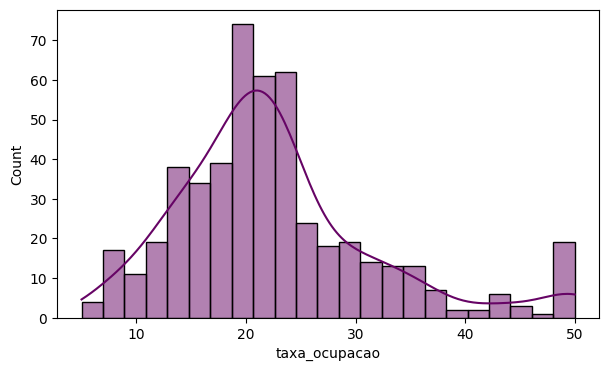

In [13]:
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.taxa_ocupacao, kde = True, color = '#660465')
plt.show()

* A variavél dependente parece estar ligeiramente assimétrica à direita.

Como a variável dependente está levemente distorcida, aplicaremos uma transformação logarítmica na coluna taxa_ocupacao e verificaremos a distribuição da coluna transformada. Foi feito isso para evitar distorção nos dados, algo causado  por valores discrepantes. O objetivo com essa transformação é analisar e compreender o padrão nos dados


Vamos verificar a assimetrica (skewness) de todas as variáveis

In [14]:
dados.skew(axis = 0)

numero_medio_quartos_por_residencia    0.408139
idade_media_residencias               -0.584415
taxa_criminalidade                     5.194110
proporcao_lotes                        2.205864
proporcao_empresas                     0.295577
rio_no_bairro                          3.380756
taxa_poluicao                          0.731641
distancia_centro                       0.993597
index_acessibilidade                   0.991658
imposto_residencial                    0.652944
taxa_professores                      -0.793662
consumo_medio_energia                 -2.868339
taxa_desabrigados                      0.893201
taxa_ocupacao                          1.099558
dtype: float64

Um valor de assimetria maior que 1 ou menor que -1 indica uma distribuição altamente distorcida. Um valor entre 0,5 e 1 ou -0,5 e -1 é moderadamente distorcido. Um valor entre -0,5 e 0,5 indica que a distribuição é bastante simétrica.

In [15]:
# Transformacao de log
dados['taxa_ocupacao_log'] = np.log(dados['taxa_ocupacao'])

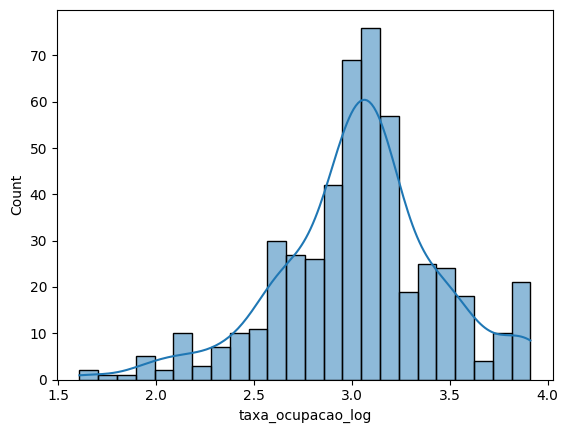

In [16]:
sns.histplot(data = dados, x = 'taxa_ocupacao_log', kde = True);

In [17]:
dados.skew(axis = 0)

numero_medio_quartos_por_residencia    0.408139
idade_media_residencias               -0.584415
taxa_criminalidade                     5.194110
proporcao_lotes                        2.205864
proporcao_empresas                     0.295577
rio_no_bairro                          3.380756
taxa_poluicao                          0.731641
distancia_centro                       0.993597
index_acessibilidade                   0.991658
imposto_residencial                    0.652944
taxa_professores                      -0.793662
consumo_medio_energia                 -2.868339
taxa_desabrigados                      0.893201
taxa_ocupacao                          1.099558
taxa_ocupacao_log                     -0.332872
dtype: float64

In [18]:
dados.head()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
0,6.575,65.2,0.00634,18.0,2.31,0,0.538,4.0900,1,296,15.3,396.90,4.98,24.0,3.178054
1,6.421,78.9,0.02731,0.0,7.07,0,0.469,4.9671,2,242,17.8,396.90,9.14,21.6,3.072693
2,7.185,61.1,0.02729,0.0,7.07,0,0.469,4.9671,2,242,17.8,392.83,4.03,34.7,3.546740
3,6.998,45.8,0.03237,0.0,2.18,0,0.458,6.0622,3,222,18.7,394.63,2.94,33.4,3.508556
4,7.147,54.2,0.06905,0.0,2.18,0,0.458,6.0622,3,222,18.7,396.90,5.33,36.2,3.589059


* A distorção foi reduzida. Agora a variável dependente apresenta estar moderadamente distorcida.
* A variável log-transformada (taxa_ocupacao_log) parece ter uma distribuição quase normal sem distorção e, portanto, podemos prosseguir.

### Análise Bivariada

Vamos verificar a correlação usando um mapa de calor. A correlação é um coeficiente da relação das variáveis que pode assumir valores de -1 a +1 sendo:

* O valor de -1 indica forte correlação negativa.
* O valor de +1 indica forte correlação positiva.
* O valor de zero indica que não há correlação.


**OBS**

* Queremos uma alta correlação das variáveis preditoras com a variável alvo e uma baixa correlação entre as variáveis preditoras.
* Alta correlação entre as variáveis preditoras (positiva ou negativa) indica problema de multicolinearidade e tem que ser resolvido.


In [19]:
dados.corr()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
numero_medio_quartos_por_residencia,1.000000,-0.243044,-0.218919,0.314221,-0.393012,0.092122,-0.303151,0.208031,-0.208559,-0.291159,-0.362163,0.127517,-0.613654,0.696424,0.632340
idade_media_residencias,-0.243044,1.000000,0.355852,-0.568654,0.645526,0.088155,0.731859,-0.747426,0.463883,0.512673,0.258119,-0.276578,0.608452,-0.376758,-0.454326
taxa_criminalidade,-0.218919,0.355852,1.000000,-0.203363,0.407351,-0.057316,0.422339,-0.384391,0.624880,0.581835,0.297472,-0.383776,0.454628,-0.390960,-0.530713
proporcao_lotes,0.314221,-0.568654,-0.203363,1.000000,-0.534292,-0.044375,-0.516414,0.663235,-0.319191,-0.320072,-0.388901,0.178462,-0.417814,0.359733,0.363476
proporcao_empresas,-0.393012,0.645526,0.407351,-0.534292,1.000000,0.063174,0.763810,-0.709502,0.599156,0.724065,0.384794,-0.357710,0.606354,-0.484606,-0.542907
rio_no_bairro,0.092122,0.088155,-0.057316,-0.044375,0.063174,1.000000,0.091835,-0.101685,-0.010326,-0.037972,-0.119013,0.050259,-0.055847,0.174606,0.158163
taxa_poluicao,-0.303151,0.731859,0.422339,-0.516414,0.763810,0.091835,1.000000,-0.770068,0.616414,0.671652,0.188255,-0.381440,0.593524,-0.427432,-0.511366
distancia_centro,0.208031,-0.747426,-0.384391,0.663235,-0.709502,-0.101685,-0.770068,1.000000,-0.505664,-0.543241,-0.226258,0.296059,-0.504135,0.248688,0.343079
index_acessibilidade,-0.208559,0.463883,0.624880,-0.319191,0.599156,-0.010326,0.616414,-0.505664,1.000000,0.909742,0.482377,-0.442594,0.485830,-0.387305,-0.487378
imposto_residencial,-0.291159,0.512673,0.581835,-0.320072,0.724065,-0.037972,0.671652,-0.543241,0.909742,1.000000,0.475243,-0.440226,0.541711,-0.473117,-0.565867


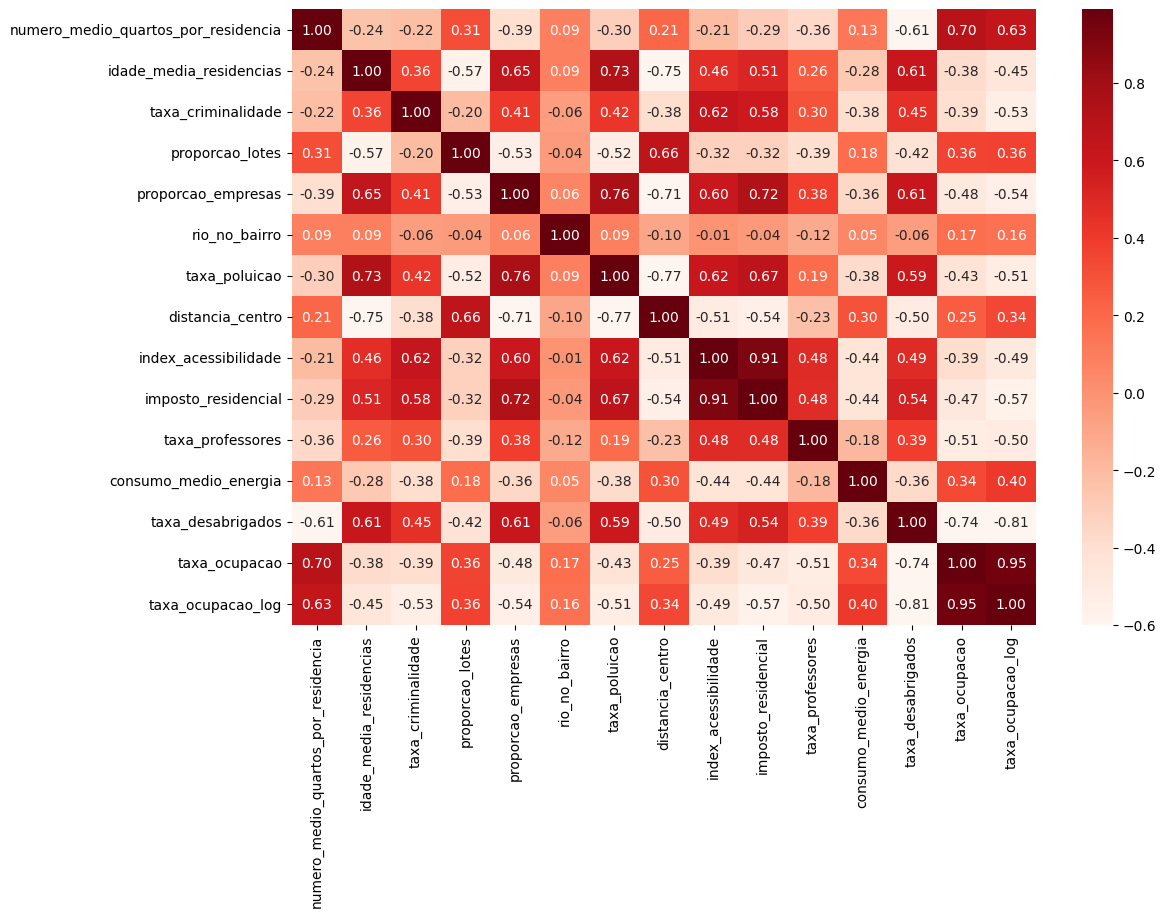

In [20]:
plt.figure(figsize = (12, 8))
sns.heatmap(dados.corr(), annot = True, fmt = '.2f', cmap = 'Reds', vmax = .99, vmin = -0.60)
plt.show()

* Vemos uma correlação significativa entre as variáveis **taxa_poluicao** e **proporcao_empresas**
* A variável **taxa_poluicao** também apresenta um alto valor de correlacao positiva com a **idade_media_residencias**, bem como um valor significativamente correlacionado negativamente com a **distancia_centro**.
* A variável proporcao_empresas tem um alto valor de correlação com imposto_residencial.
* A **taxa_ocupacao** tem um alto valor de correlacao com **numero_medio_quartos_por_residencia**, e também significamente correlacionado negativamente com **taxa_desabrigados**.
* Analise todas as correlações entre 0.59 e 0.99

Foi analisado a seguir as variáveis com maior correlação.

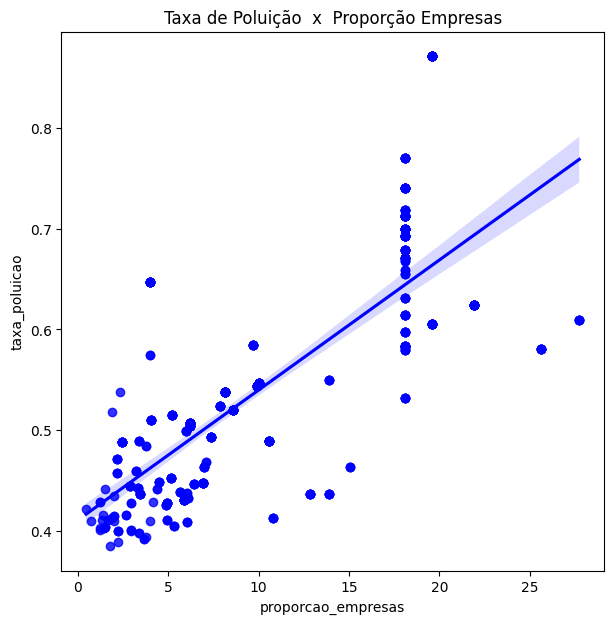

In [21]:
plt.figure(figsize = (7, 7,))
sns.regplot(x = 'proporcao_empresas', y = 'taxa_poluicao', data = dados, color = 'blue')
plt.title('Taxa de Poluição  x  Proporção Empresas')
plt.show()

In [22]:
# Coeficiente de Correlação
print('A correlação entre as variáveis é: ', pearsonr(dados['proporcao_empresas'], dados['taxa_poluicao'])[0])

A correlação entre as variáveis é:  0.7638104350783936


* **Correlação Positiva**: A taxa de poluição aumenta em bairros com maior proporção de empresas

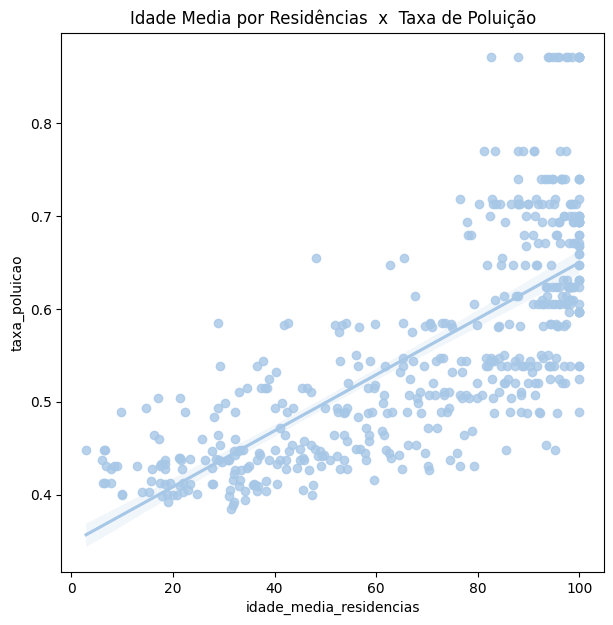

In [23]:
plt.figure(figsize = (7, 7))
sns.regplot(x = 'idade_media_residencias', y = 'taxa_poluicao', data = dados, color = '#A7C7E7')
plt.title('Idade Media por Residências  x  Taxa de Poluição')
plt.show()

In [24]:
# Coeficiente de Correlação
print('A correlação entre as variáveis é: ', pearsonr(dados['idade_media_residencias'], dados['taxa_poluicao'])[0])

A correlação entre as variáveis é:  0.731858631014224


* **Correlação Positiva**: A taxa de poluição aumenta em bairros com residências de maior idade (contruídas há mais tempo)

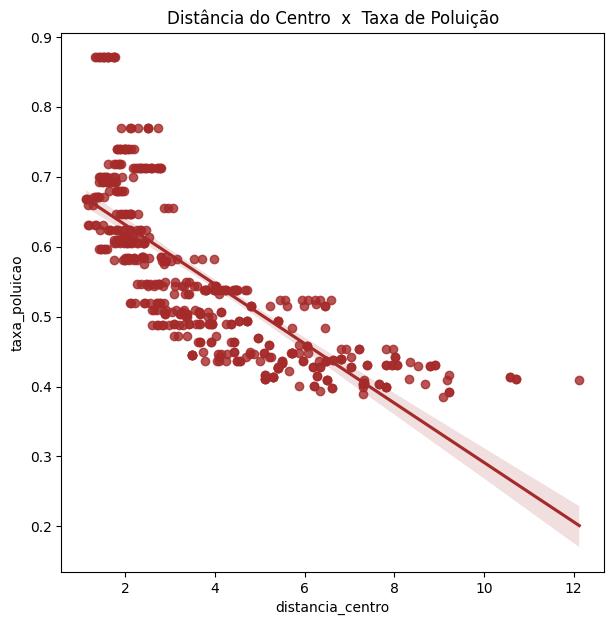

In [25]:
plt.figure(figsize = (7, 7))
sns.regplot(x = 'distancia_centro', y = 'taxa_poluicao', data = dados, color = 'brown')
plt.title('Distância do Centro  x  Taxa de Poluição')
plt.show()

In [26]:
# Coeficiente de Correlação
print('A correlação entre as variáveis é: ', pearsonr(dados['distancia_centro'], dados['taxa_poluicao'])[0])

A correlação entre as variáveis é:  -0.7700682232177493


* Correlação Negativa: A taxa de poluição diminui em bairros à medida que aumenta a distância para o centro da cidade

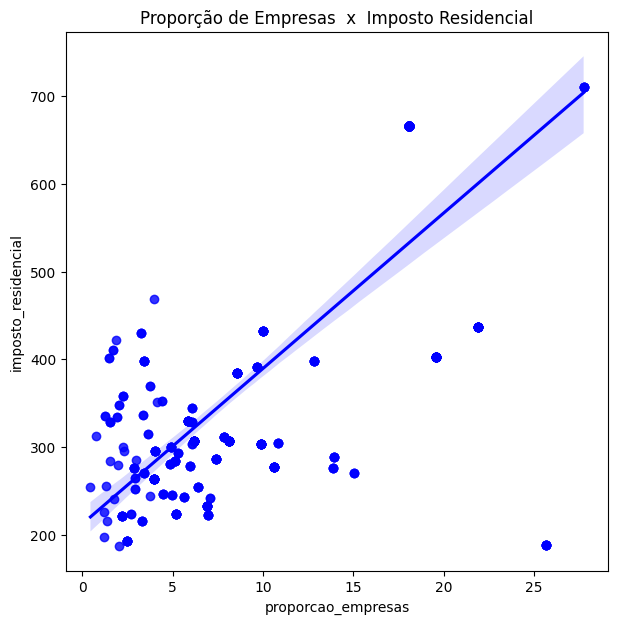

In [27]:
plt.figure(figsize= (7, 7))
sns.regplot(x = 'proporcao_empresas', y = 'imposto_residencial', data = dados, color = 'blue')
plt.title('Proporção de Empresas  x  Imposto Residencial')
plt.show()

In [28]:
# Coeficiente de Correlação
print('A correlação entre as variáveis é: ', pearsonr(dados['proporcao_empresas'], dados['imposto_residencial'])[0])

A correlação entre as variáveis é:  0.7240653150756317


* Correlação Positiva: O imposto aumenta com um aumento na proporção de empresas por bairro. Isso pode ser devido ao fato das variáveis estarem relacionadas com uma terceira variável.

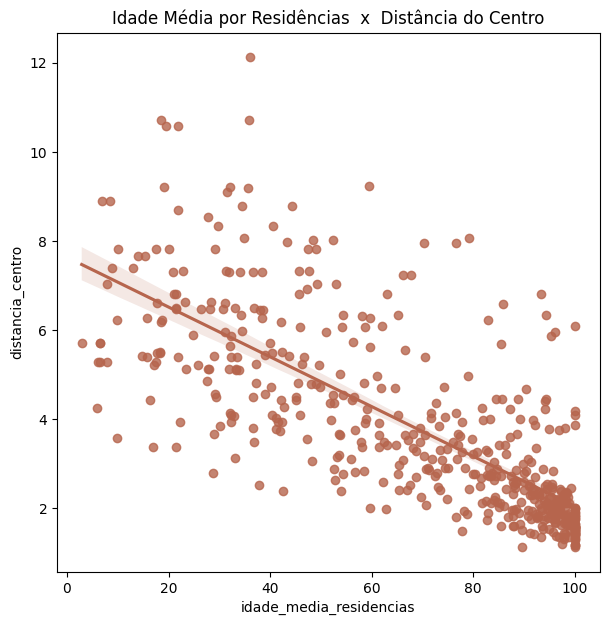

In [29]:
plt.figure(figsize= (7, 7))
sns.regplot(x = 'idade_media_residencias', y = 'distancia_centro', data = dados, color = '#B6654D')
plt.title('Idade Média por Residências  x  Distância do Centro')
plt.show()

In [30]:
# Coeficiente de Correlação
print('A correlação entre as variáveis é: ', pearsonr(dados['idade_media_residencias'], dados['distancia_centro'])[0])

A correlação entre as variáveis é:  -0.7474258681640548


* Correlação Negativa: À medida que aumenta a distância do centro, diminui a idade média das residências

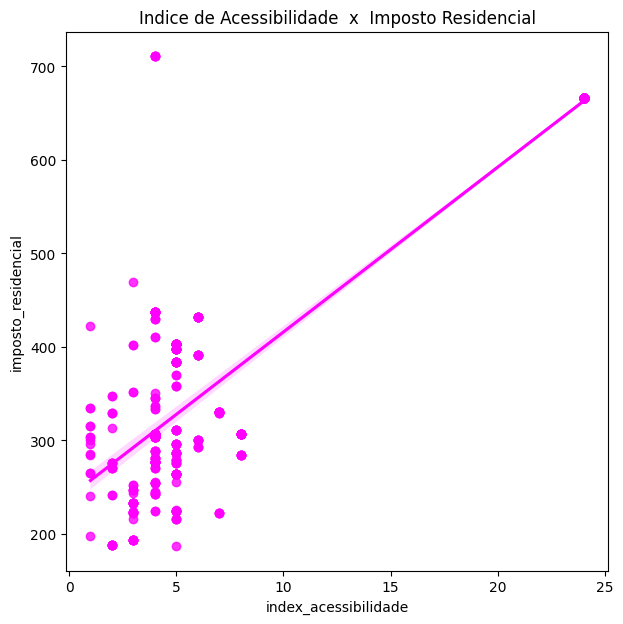

In [31]:
plt.figure(figsize= (7, 7))
sns.regplot(x = 'index_acessibilidade', y = 'imposto_residencial', data = dados, color = 'magenta')
plt.title('Indice de Acessibilidade  x  Imposto Residencial')
plt.show()

In [32]:
# Coeficiente de Correlação
print('A correlação entre as variáveis é: ', pearsonr(dados['index_acessibilidade'], dados['imposto_residencial'])[0])

A correlação entre as variáveis é:  0.9097418944674466


* Correlação Positiva: A correlação entre as variáveis é muito alta, mas nenhuma tendência é visível entre as duas variáveis. Isso pode ser devido a outliers.

Vamos realizar um trabalho de tratamento de outliers nas variáveis do gráfico anterior. E então vamos verificar a correlação depois de remover os valores discrepantes. Quando plotamos o histograma na análise univariada observamos que a maioria dos valores está abaixo de 600

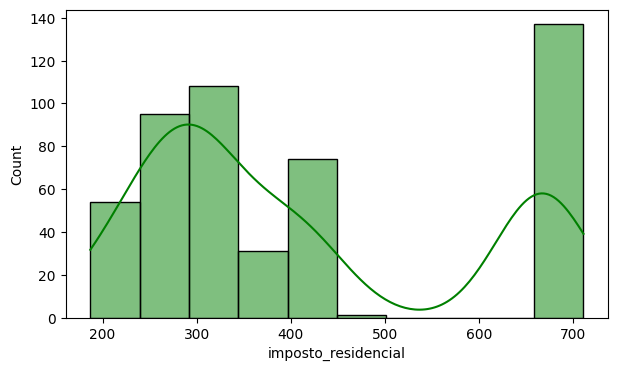

In [33]:
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.imposto_residencial, kde = True, color = 'green')
plt.show()

In [34]:
df1 = dados[dados['imposto_residencial'] < 600]

In [35]:
# Coeficiente de Correlação
print('A correlação entre as variáveis é: ', pearsonr(df1['index_acessibilidade'], df1['imposto_residencial'])[0])

A correlação entre as variáveis é:  0.23887638770857889


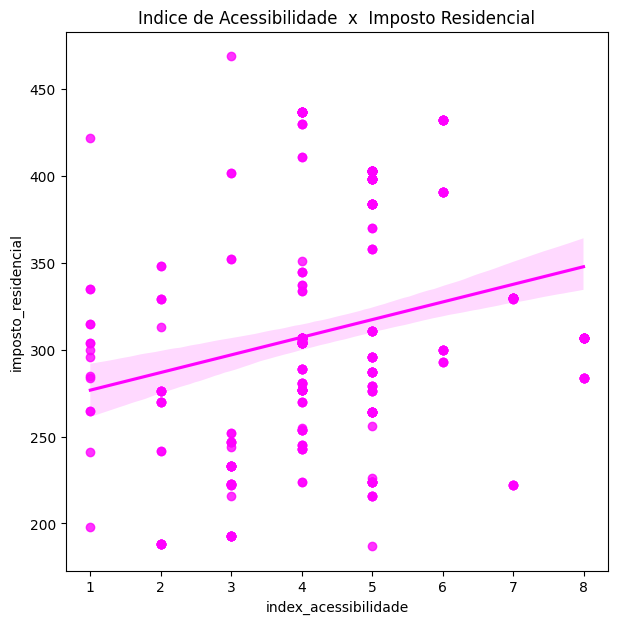

In [36]:
# Coeficiente de correlação
plt.figure(figsize= (7, 7))
sns.regplot(x = 'index_acessibilidade', y = 'imposto_residencial', data = df1, color = 'magenta')
plt.title('Indice de Acessibilidade  x  Imposto Residencial')
plt.show()


* **Correlação Positiva**.
* A correlação entre as duas variáveis era de 0.91 antes de remover os outliers. Caiu para 0.24 após a remoção.
* Portanto, a alta correlação entre as variáveis se deve ao outliers. O valor do imposto para algumas propriedades pode ser maior devido a algum outro motivo.
* Não parece haver relação entre as duas variáveis diretamente.

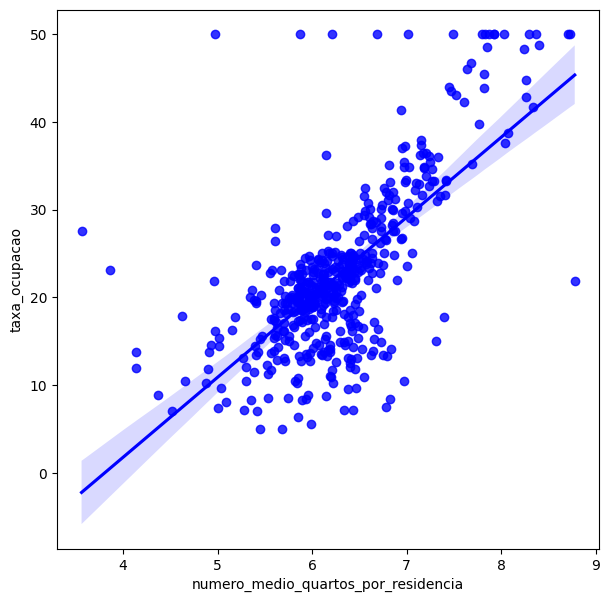

In [37]:
plt.figure(figsize= (7, 7))
sns.regplot(x = 'numero_medio_quartos_por_residencia', y = 'taxa_ocupacao', data = dados, color = 'blue')
plt.show()

In [38]:
# Coeficiente de Correlação
print('A correlação entre as variáveis é: ', pearsonr(dados['numero_medio_quartos_por_residencia'], dados['taxa_ocupacao'])[0])

A correlação entre as variáveis é:  0.6964238264843786


* **Correlação Positiva**.
* A taxa de ocupação das casas parece aumentar à medida que aumenta o número médio de quartos na residência. Isso é esperado, pois a taxa de ocupação pode ser mais alta se houver mais quartos
* Existem alguns valores discrepantes em uma linha horizontal no topo do gráfico. Parece indicar um limite nos dados

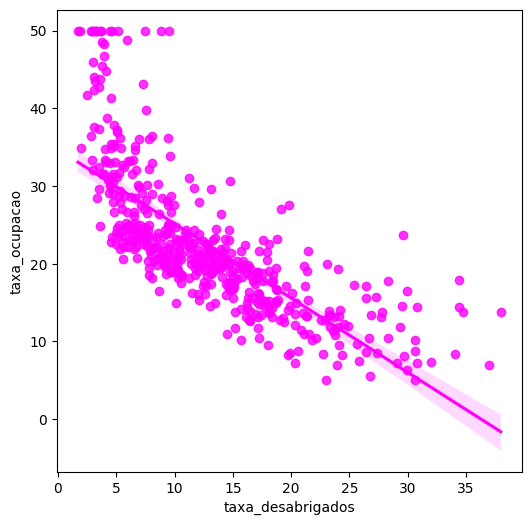

In [39]:
plt.figure(figsize= (6, 6))
sns.regplot(x = 'taxa_desabrigados', y = 'taxa_ocupacao', data = dados, color = 'magenta')
plt.show()

In [40]:
# Coeficiente de Correlação
print('A correlação entre as variáveis é: ', pearsonr(dados['taxa_desabrigados'], dados['taxa_ocupacao'])[0])

A correlação entre as variáveis é:  -0.7422362776461561


* Bairros com maior número de desabrigados apresentam uma taxa menor de ocupação das residências.
* Existem poucos outliers e os dados parecem estar limitados a 50.

### Conclusão da Análise Exploratória

Existem relações significativas entre algumas variáveis independentes, o que não é desejável para um modelo de regressão linear

### Preparação dos dados para a modelagem estatística

In [41]:
y = dados['taxa_ocupacao_log']
X = dados.drop(columns = {'taxa_ocupacao', 'taxa_ocupacao_log'})

In [42]:
# Divide os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size= 0.20, random_state= 1)

In [43]:
X_treino.shape

(400, 13)

### Verificando a Multicolinearidade com VIF

Em seguida, verificaremos a multicolinearidade no conjunto de dados de treino. Utilizaremos o Variance Inflation Factor (VIF), para verificar se há multicolinearidade nos dados.

O Variance Inflation Factor (VIF) é uma medida que quantifica o quanto a variância de um estimador de regressão (coeficiente) é aumentada devido à multicolinearidade na regressão múltipla. A multicolinearidade ocorre quando há correlações altes entre duas ou mais variáveis explicativas (independentes) em um modelo de regressão, o que pode dificultar a estimação dos coeficientes da regressão com precisão.

Variáveis com score (pontuação) VIF > 5 serão descartados/tratados até que todos os recursos tenham pontuação VIF < 5

In [44]:
# Função para checar o VIF de todas as variáveis
def verifica_vif(train):

    vif = pd.DataFrame()

    vif["feature"] = train.columns

    vif["vif"]  = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif

In [45]:
print(verifica_vif(X_treino))

                                feature        vif
0   numero_medio_quartos_por_residencia  79.891041
1               idade_media_residencias  21.999229
2                    taxa_criminalidade   1.986129
3                       proporcao_lotes   2.995889
4                    proporcao_empresas  14.274312
5                         rio_no_bairro   1.163134
6                         taxa_poluicao  72.198368
7                      distancia_centro  15.124267
8                  index_acessibilidade  16.869623
9                   imposto_residencial  66.888831
10                     taxa_professores  89.425493
11                consumo_medio_energia  20.530499
12                    taxa_desabrigados  11.856588


Podemos ver que a maioria das variáveis possui um vif muito maior do que 5. Um dos fatores que podem estar influenciando isso é a diferença das escalas entre as variáveis numéricas. Por conta disso, será feito uma padronização dos dados.

### Aplicando a padronização dos dados utilizando o StandardScaler

O StandardScaler transforma os valores de uma variável para que tenham média zero e desvio padrão um, garantindo que os dados estejam na mesma escala.

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

Onde:

* X é o valor original da variável

* μ é média da variável

* σ é o desvio padrão da variável

In [46]:
# Cria o padronizador
scaler = StandardScaler()

In [47]:
# Fit e transform em treino
X_treino_scaled = scaler.fit_transform(X_treino)

In [48]:
X_treino_scaled.shape

(400, 13)

In [49]:
# Transform em teste
X_test_scaled = scaler.transform(X_teste)

In [50]:
X_test_scaled.shape

(100, 13)

### Modelagem Estatística

Usaremos o statsmodels, ela é uma biblioteca poderosa para modelagem estatística e é amplamente utilizada em ciência de dados quando precisamos interpretar os resultados dos modelos com mais profundidade.

* Permite verificar coeficientes, estatísticas R quadrado e significância das variáveis
* Permite verificar suposições dos modelos, como normalidade, heterocedasticidade e autocorrelação


**OBS** 

Em regressão linear, o modelo tem a forma:

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n + \varepsilon
$$

O termo $$ \beta_0 $$ é o intercepto da equação, ou seja, o valor de \( y \) quando todas as variáveis independentes (\( X \)) são zero.

O `statsmodels` não adiciona automaticamente esse termo, então é necessário incluir manualmente com `sm.add_constant()`.


In [51]:
# Adiciona a constante (obrigatorio para modelos criados com Statsmodels)

X_treino_const = sm.add_constant(X_treino_scaled)

In [52]:
# Criando a versão do modelo
modelo = sm.OLS(y_treino, X_treino_const).fit()

In [53]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     120.5
Date:                Sat, 08 Feb 2025   Prob (F-statistic):          5.52e-127
Time:                        20:57:17   Log-Likelihood:                 111.52
No. Observations:                 400   AIC:                            -195.0
Df Residuals:                     386   BIC:                            -139.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.009    326.592      0.000       3.025       3.062
x1             0.0668      0.013      5.035      0.000       0.041       0.093
x2             0.0269      0.017      1.607      0.109      -0.006       0.060
x3            -0.0940      0.012     -7.713      0.000      -0.118      -0.070
x4             0.0343      0.014      2.372      0.018       0.006       0.063
x5             0.0116      0.018      0.628      0.530      -0.025       0.048
x6             0.0239      0.010      2.477      0.014       0.005       0.043
x7            -0.0906      0.020     -4.628      0.000      -0.129      -0.052
x8            -0.0987      0.019     -5.221      0.000      -0.136      -0.062
x9             0.1180      0.027      4.409      0.000       0.065       0.171
x10           -0.1059      0.029     -3.599      0.000      -0.164      -0.048
x11           -0.0731      0.013     -5.678      0.000      -0.098      -0.048
x12            0.0220      0.011      2.048      0.041       0.001       0.043
x13           -0.2191      0.016    -13.331      0.000      -0.251      -0.187
==============================================================================
Omnibus:                       55.164   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.106
Skew:                           0.616   Prob(JB):                     1.90e-37
Kurtosis:                       5.938   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Precisamos de um dataframe para checar o VIF. Vamos incluir o nome de cada coluna para facilitar a análise.

In [54]:
df_X_treino = pd.DataFrame(X_treino_scaled, columns=['numero_medio_quartos_por_residencia',
                                                     'idade_media_residencias',
                                                     'taxa_criminalidade',
                                                     'proporcao_lotes',
                                                     'proporcao_empresas',
                                                     'rio_no_bairro',
                                                     'taxa_poluicao',
                                                     'distancia_centro',
                                                     'index_acessibilidade',
                                                     'imposto_residencial',
                                                     'taxa_professores',
                                                     'consumo_medio_energia',
                                                     'taxa_desabrigados'])

In [55]:
verifica_vif(df_X_treino)

,feature,vif
0,numero_medio_quartos_por_residencia,2.028621
1,idade_media_residencias,3.216635
2,taxa_criminalidade,1.708968
3,proporcao_lotes,2.409812
4,proporcao_empresas,3.920927
5,rio_no_bairro,1.074111
6,taxa_poluicao,4.415409
7,distancia_centro,4.114200
8,index_acessibilidade,8.242494
9,imposto_residencial,9.966244


**Análise**

* As variáveis index_acessibilidade e imposto_residencial apresentam um VIF maior que 5, indicando multicolinearidade. Vamos remover as variáveis.
* O VIF precisa ser calculado somente com dados de treino. Mas as variáveis devem ser removidas em treino e teste.

In [56]:
del df_X_treino["index_acessibilidade"]

In [57]:
del df_X_treino["imposto_residencial"]

In [58]:
df_X_treino.shape

(400, 11)

In [59]:
df_X_treino.columns

Index(['numero_medio_quartos_por_residencia', 'idade_media_residencias',
       'taxa_criminalidade', 'proporcao_lotes', 'proporcao_empresas',
       'rio_no_bairro', 'taxa_poluicao', 'distancia_centro',
       'taxa_professores', 'consumo_medio_energia', 'taxa_desabrigados'],
      dtype='object')

In [60]:
# Convertemos o array de teste em dataframe de teste
df_X_teste = pd.DataFrame(X_test_scaled, columns=['numero_medio_quartos_por_residencia',
                                                     'idade_media_residencias',
                                                     'taxa_criminalidade',
                                                     'proporcao_lotes',
                                                     'proporcao_empresas',
                                                     'rio_no_bairro',
                                                     'taxa_poluicao',
                                                     'distancia_centro',
                                                     'index_acessibilidade',
                                                     'imposto_residencial',
                                                     'taxa_professores',
                                                     'consumo_medio_energia',
                                                     'taxa_desabrigados'])

In [61]:
del df_X_teste["index_acessibilidade"]
del df_X_teste["imposto_residencial"]

In [62]:
df_X_teste.shape

(100, 11)

In [63]:
print(verifica_vif(df_X_treino))

                                feature       vif
0   numero_medio_quartos_por_residencia  1.944437
1               idade_media_residencias  3.190144
2                    taxa_criminalidade  1.436394
3                       proporcao_lotes  2.250999
4                    proporcao_empresas  3.289783
5                         rio_no_bairro  1.057753
6                         taxa_poluicao  3.815908
7                      distancia_centro  4.113862
8                      taxa_professores  1.517930
9                 consumo_medio_energia  1.291092
10                    taxa_desabrigados  3.106567


* Removemos a multicolinearidade do dataset e assim atendemos a uma das suposições da regressão linear.

In [64]:
# Converte o dataframe de volta para o formato numpy
X_treino_scaled = df_X_treino.to_numpy()

In [65]:
X_treino_scaled.shape

(400, 11)

In [66]:
# Converte o dataframe de volta para o formato numpy
X_test_scaled = df_X_teste.to_numpy()

In [67]:
X_test_scaled.shape

(100, 11)

### Faremos uma nova modelagem estatística, a diferença é que, não teremos as variáveis multicolineares.

In [68]:
# Adcionando a constante
X_treino_const = sm.add_constant(X_treino_scaled)

In [69]:
# Cria o modelo
modelo_3 = sm.OLS(y_treino, X_treino_const).fit()

In [70]:
# Sumário
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     120.5
Date:                Sat, 08 Feb 2025   Prob (F-statistic):          5.52e-127
Time:                        20:57:17   Log-Likelihood:                 111.52
No. Observations:                 400   AIC:                            -195.0
Df Residuals:                     386   BIC:                            -139.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.009    326.592      0.000       3.025       3.062
x1             0.0668      0.013      5.035      0.000       0.041       0.093
x2             0.0269      0.017      1.607      0.109      -0.006       0.060
x3            -0.0940      0.012     -7.713      0.000      -0.118      -0.070
x4             0.0343      0.014      2.372      0.018       0.006       0.063
x5             0.0116      0.018      0.628      0.530      -0.025       0.048
x6             0.0239      0.010      2.477      0.014       0.005       0.043
x7            -0.0906      0.020     -4.628      0.000      -0.129      -0.052
x8            -0.0987      0.019     -5.221      0.000      -0.136      -0.062
x9             0.1180      0.027      4.409      0.000       0.065       0.171
x10           -0.1059      0.029     -3.599      0.000      -0.164      -0.048
x11           -0.0731      0.013     -5.678      0.000      -0.098      -0.048
x12            0.0220      0.011      2.048      0.041       0.001       0.043
x13           -0.2191      0.016    -13.331      0.000      -0.251      -0.187
==============================================================================
Omnibus:                       55.164   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.106
Skew:                           0.616   Prob(JB):                     1.90e-37
Kurtosis:                       5.938   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Em modelagem estatística, o valor-p é uma medida da probabilidade de que os resultados observados tenham ocorrido por acaso. É comumente usado em testes de hipóteses para determinar se um determinado modelo ou hipótese é suportado pelos dados.

No contexto de uma tabela de modelagem estatística, o valor-p é normalmente apresentado como uma coluna na tabela e reflete a probabilidade de obter os resultados observados dada a suposição de que a hipótese nula é verdadeira. A hipótese nula é uma afirmação de que não há relação entre as variáveis preditoras e a variável de resposta no modelo.

Por exemplo, se o valor-p para uma determinada variável preditora na tabela de modelagem estatística for muito pequeno (geralmente menor que 0,05), isso indica que há uma probabilidade baixa de obter os resultados observador apenas por acaso e, portanto, a hipótese nula pode ser rejeitada. Isso sugere que existe uma relação estatisticamente significativa entre a variável preditora e a variável resposta.

Por outro lado, se o valor-p for grande (geralmente maior que 0,05), indica que os resultados observados podem ter ocorrido por acaso, e a hipótese nula não for rejeitada. Nesse caso, não há evidências suficientes para sustentar a presença de uma relação entre a variável preditora e a variável resposta.

É importante observar que o valor-p é apenas um fator a ser considerado ao avaliar os resultados de um modelo estatístico. Outros fatores, como a magnitude do efeito e a força da associação, também devem ser levados em consideração na interpretação dos resultados do modelo.

* O R2 teve uma leve caída, mas ainda temos uma boa performance.
* Variáveis x2, x5 e x10 apresentaram valor-p muito maior que 0.05. Logo, não parecem significantes para o modelo e vamos removê-las

In [71]:
# Removemos as colunas de índice 1, 4 e 9 em treino
X_treino_clean = np.delete(X_treino_scaled, [1, 4, 9], axis = 1)

In [72]:
# Removemos as colunas de índice 1, 4, e 9 em teste também
X_teste_clean = np.delete(X_test_scaled, [1, 4, 9], axis = 1)

In [73]:
X_treino_clean.shape

(400, 8)

In [74]:
X_teste_clean.shape

(100, 8)

Agora será feito a modelagem estatística, utilizando os dados já padronizados, sem as variáveis multicolineares e sem as variáveis com baixa significância para explicar a variável alvo.

In [75]:
# Adiciona a constante
X_treino_const = sm.add_constant(X_treino_clean)

In [76]:
# Cria o modelo
modelo = sm.OLS(y_treino, X_treino_const).fit()

In [77]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     183.3
Date:                Sat, 08 Feb 2025   Prob (F-statistic):          3.17e-127
Time:                        20:57:18   Log-Likelihood:                 98.927
No. Observations:                 400   AIC:                            -179.9
Df Residuals:                     391   BIC:                            -143.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.010    318.514      0.000       3.025       3.062
x1             0.0796      0.013      6.157      0.000       0.054       0.105
x2            -0.0855      0.011     -7.629      0.000      -0.108      -0.063
x3             0.0223      0.014      1.573      0.116      -0.006       0.050
x4             0.0300      0.010      3.063      0.002       0.011       0.049
x5            -0.0844      0.016     -5.202      0.000      -0.116      -0.053
x6            -0.1040      0.018     -5.794      0.000      -0.139      -0.069
x7            -0.0666      0.011     -5.905      0.000      -0.089      -0.044
x8            -0.2133      0.015    -13.938      0.000      -0.243      -0.183
==============================================================================
Omnibus:                       57.577   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.212
Skew:                           0.627   Prob(JB):                     3.67e-41
Kurtosis:                       6.099   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Removemos a coluna de índice 2 em treino
X_treino_clean2 = np.delete(X_treino_clean, [2], axis = 1)

In [79]:
# Removemos a coluna de índice 2 em teste
X_teste_clean2 = np.delete(X_teste_clean, [2], axis = 1)

In [80]:
X_treino_clean2.shape

(400, 7)

In [81]:
X_teste_clean2.shape

(100, 7)

* Nova versão do modelo sem a variável de índice 2

In [82]:
# Adicionando a constante
X_treino_const = sm.add_constant(X_treino_clean2)

In [83]:
# Cria o modelo
modelo_final = sm.OLS(y_treino, X_treino_const).fit()

In [84]:
modelo_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     208.3
Date:                Sat, 08 Feb 2025   Prob (F-statistic):          7.24e-128
Time:                        20:57:18   Log-Likelihood:                 97.665
No. Observations:                 400   AIC:                            -179.3
Df Residuals:                     392   BIC:                            -147.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.010    317.916      0.000       3.025       3.062
x1             0.0829      0.013      6.491      0.000       0.058       0.108
x2            -0.0827      0.011     -7.458      0.000      -0.104      -0.061
x3             0.0297      0.010      3.026      0.003       0.010       0.049
x4            -0.0838      0.016     -5.155      0.000      -0.116      -0.052
x5            -0.0889      0.015     -5.849      0.000      -0.119      -0.059
x6            -0.0715      0.011     -6.579      0.000      -0.093      -0.050
x7            -0.2131      0.015    -13.900      0.000      -0.243      -0.183
==============================================================================
Omnibus:                       61.760   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.712
Skew:                           0.675   Prob(JB):                     2.61e-44
Kurtosis:                       6.197   Cond. No.                         3.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusões

* O valor do R2 é quase o mesmo, mas agora sem variáveis multicolineares e sem variáveis irrelevantes

* Concluímos a modelagem estatística e temos as melhores variáveis para prevar a variável alvo

### Validação das Suposições da Regressão Linear

1 - **Linearidade**

2 - **Independência dos Erros**

3 - **Homocedasticidade**

4 - **Normalização dos Erros**

5 - **Sem Multicolinearidade**

1 - A linearidade simplesmente implica que a variável dependente (y) pode ser expressa como uma função linear das variáveis explicativas (x) que estamos escolhendo para explicar a variação na variável y. Ela também precisa que a relação entre as variáveis independentes e dependentes seja linear. Também é importante verificar se há valores discrepantes, pois a regressão linear é sensível a outliers. A suposição de linearidade pode ser melhor testa com gráficos de dispersão ou o usando o teste **linear_rainbow**.

* Esse teste, é um teste que verifica se uma regressão linear é homocedátisca ou heterocedástica. Ele é chamado de "rainbow" porque ele usa vários valores de corte para dividir os dados em grupos e comparar os reísudos desses grupos. Se os resíduos dos grupos tiverem variações similares, isso sugere que a regressão é homocedástica. Se os resíduos dos grupos tiverem variações diferentes, isso sugere que a regressão é heterocedástica.


**Homocedástica** acontece quando os erros do modelo possuem uma viriância constante ao longo dos valores da variável explicativa. Isso significa que o ruído (ou incerteza) nos dados é distribuído de maneira uniforme.

**Heterocedástica** Ocorre quando a variância dos erros **Não é constante**, ou seja, ela muda dependendo do valor das variáveis explicativas. Isso pode indicar que o modelo não está capturando bem a relação entre as variáveis.

Para interpretar o resultado, pode-se comparar o valor-p (resultado do teste) com um nível de significância pré-determinado (por exemplo, 0.05).

* Se o valor-p for menor que o nível de significância, rejeitamos a H0. Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica. A suposição não pode ser satisfeita.

* Se o valor-p for maior que a nível de significância, falhamos em rejeitar a H0. Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita.

In [85]:
def valida_sup1(nome_modelo):
    modelo = nome_modelo

    # Aplica o linear_rainbow com, frac = 5 indica a fração de observações usada para dividir a amostra no teste
    # usaremos [1] para pegar o valor-p correspondente ao teste
    lin_p = sms.linear_rainbow(modelo, frac = 0.5)[1]

    print(lin_p)

    #Inicializa a variável com Falha
    result = "Rejeitamos a H0 (Hipótese Nula). Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica"

    #Testando o resultado
    if lin_p > 0.05:
        result = "Sucesso, falhamos em rejeitar a Hipótese Nula e isso indica que provavelmente a regressão é homocedástica"

    return np.transpose(pd.DataFrame([[lin_p], [0.05], [result]], index = ['Valor-p', 'Alfa', 'Resultado'],
                                      columns = ['Valor-p do Teste Rainbow Linearity'] ))

In [86]:
valida_sup1(modelo_final)

0.7311264246842825


,Valor-p,Alfa,Resultado
Valor-p do Teste Rainbow Linearity,0.731126,0.05,"Sucesso, falhamos em rejeitar a Hipótese Nula ..."


Com base resultado do teste aplicado. Falhamos em rejeitar a hipótese nula. Isso infica que a regressão é provavelmente homocedástica e a suposição está satisfeita.

### independência dos erros

Na regressão linear, a suposição de indepência dos erros é a suposição de que os erros (resíduos) são independentes entre si. Isso significa que o valor de um erro não deve ser afetado pelo valor de qualquer outro erro.

Essa suposição é importante porque ela é necessária para que o cálculo dos intervalos de confiança e dos valores-p dos parâmetros seja preciso. Se a suposição de indepência dos erros não for satisfeita, os intervalos de confiança e os valores-p podem ser imprecisos ou enganosos.

Para verificar isso, podemos plotar um gráfico de resíduos X tempo (se os dados forem observações ao longo do tempo) e verificar se há algum padrão evidente. Podemos usar um teste estatístico, como o Teste de Durbin-Watson, para verificar se a suposição de independência dos erros está sendo satisfeita. Se essa suposição não for satisfeita, podemos tentar usar um modelo de regressão diferente ou incluir variáveis adicionais no modelo para controlar o efeito da dependência dos erros.


Para testar essa suposição, vamos plotar os resíduos e os valores ajustados em um gráfico e garantiremos que os resíduos não formem um padrão forte. Eles devem ser aleatoriamente e uniformente espalhados no eixo.

In [87]:
# extraindo os residuos do modelo
residuos = modelo_final.resid

In [88]:
residuos

238   -0.166180
438   -0.030578
475   -0.054838
58     0.060189
380    0.166027
         ...   
255   -0.040429
72    -0.143031
396   -0.236106
235    0.007499
37    -0.097867
Length: 400, dtype: float64

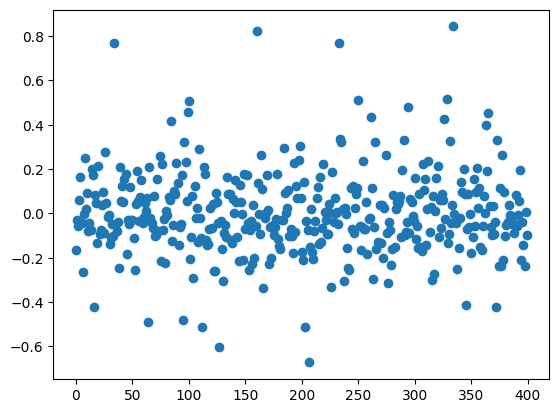

In [89]:
plt.scatter(range(len(X_treino_clean2)), residuos)
plt.show()

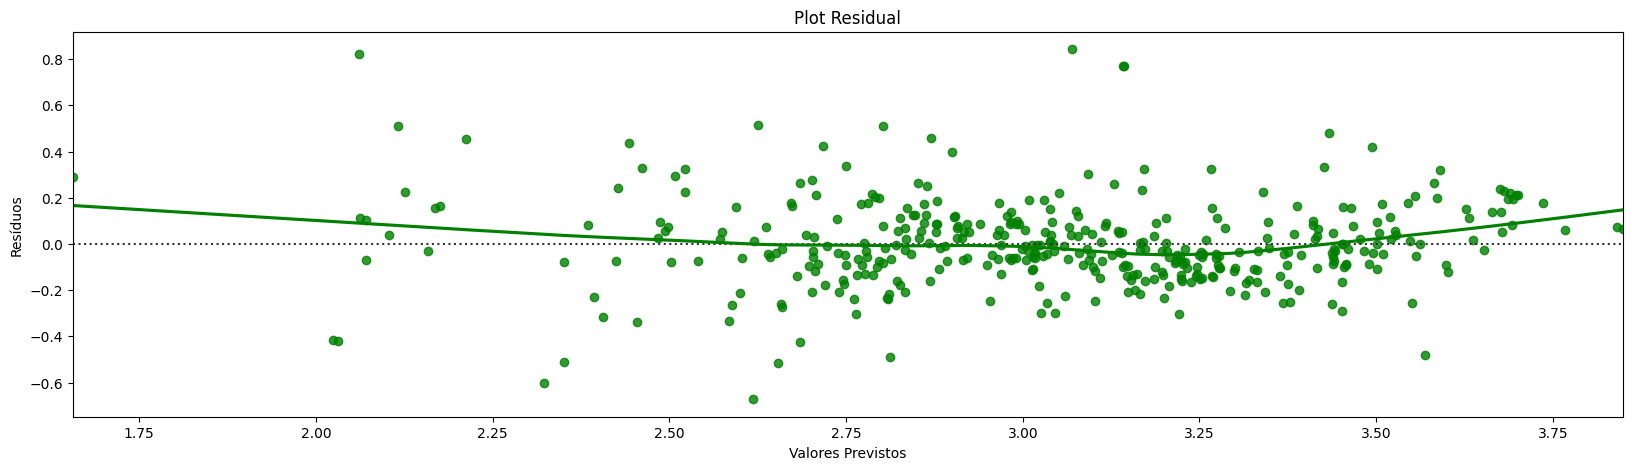

In [90]:
# Valores previstos
valores_previstos = modelo_final.fittedvalues

plt.figure(figsize = (20, 5))
sns.residplot(x = valores_previstos, y = residuos, color = "green", lowess = True)
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Plot Residual")
plt.show()

* A média dos resíduos é muito próxima de 0, portanto, a suposição para os resíduos é satisfeita. Os resíduos são plotados aleatoriamente em torno de 0.

* Os resíduos saltam aleatoriamente em torno da linha 0. Isso sugere que não há autocorrelação.

* Os resíduos formam aproximadamente uma faixa horizontal em torno da linha 0. Isso sugere que as variâncias dos termos de erro são iguais.

* Nenhum resíduo se destaca do padrão aleatório básico de resíduos. Isso sugere que não há outliers.

O **teste de Durbin-Watson** é um teste estatístico que verifica se a suposição de independência dos erros está sendo satisfeita em um modelo de regressão linear. Esse teste é especialmente útil quando os dados são observações ao longo do tempo, pois pode detectar autoccorelação nos erros.

Para aplicar esse teste no statsmodels, pode-se usar o método durbin_watson(). Esse método retorna um valor entre 0 e 4, onde valores próximos de 0 indicam autorrelação positiva nos erros e valores próximos de 4 indicam autocorrelação negativa nos erros. Valores próximos de 2 indicam ausência de autocorrelação nos erros.

In [91]:
import statsmodels
import statsmodels.stats
import statsmodels.stats.stattools

def valida_sup2(residuos):

    resultado = statsmodels.stats.stattools.durbin_watson(residuos)
    print('Resultado do teste: ', resultado)

    if resultado < 1.9:
        print("Há evidências de autocorrelação positiva nos erros, suposição não pode ser satisfeita")

    elif resultado > 2.1:
        print("Há evidências de autocorrelação negativa nos erros, suposição não satisfeita")

    else:
        print("Não há evidências de autocorrelação nos erros, suposição satisfeita")

In [92]:
valida_sup2(residuos)

Resultado do teste:  2.0139604390878976
Não há evidências de autocorrelação nos erros, suposição satisfeita


### Homocedasticidade

A suposição de homocedasticidade (mesma variância) é fundamental para os modelos de regressão linear. A homocedasticidade descreve uma situação em que o termo de erro (ruído ou pertubação aleatória na relação entre as variáveis independentes e a variável dependente) é o mesmo em todos os valores das variáveis independentes.

A **heterocedasticidade** (violação da homocedasticidade) está presente quando o tamanho do termo de erro difere entre os valores de uma variável independente. O impacto da violação do pressuposto da homocedasticidade é uma questão de grau, aumentando à medida que a heterocedasticidade aumenta.

**Homocedasticidade** - Se os resíduos forem distribuídos simetricamente ao longo da linha de regressão, os dados são considerados homocedásticos (a variabilidade é igual entre os valores de uma variável explicativa).

**Heterocedasticidade** - Se os resíduos não forem distribuídos simetricamente ao longo da linha de regressão, os dados são considerados heterocedásticos. Nesse caso, os resíduos podem ter uma forma de funil ou qualquer outra forma não simétrica

Usaremos o teste de Goldfeld-Quandt para testar a seguinte hipótese com alfa = 0.05

    * Hipótese Nula: Há evidências de heterocedasticidade (a regressão não é homocedástica).
    * Hipótese Alternativa: Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica)

O teste que vamos aplicar, deve rejeitar a hipótese nula

O teste de Goldfeld-Quandt é um teste que verifica se uma regressão linear é homocedástica ou heterocedástica. Esse teste é realizado dividindo os dados em dois grupos e comparando os resíduos dos dois grupos. Se os resíduos dos dois grupos tiverem variações similares, isso sugere que a regressão é homocedástica. Se os resíduos dos dois grupos tiverem variações diferentes, isso sugere que a regressão é heterocedástica.

usando o método het_goldfeldquandt().

Para interpretar o resultado, você pode comparar o valor-p com um nível de significância pré-determinado, 0.005.

* Se o valor-p for menor que o nível de significância, rejeitamos a Hipótese Nula. Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica.

* Se o valor-p for maior que o nível de significância, falhamos em rejeitar a Hipótese Nula. Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita


O problema que a heterocedasticiade apresenta para modelos de regressão é simples. A regressã ode mínimos quadrados ordinários (OLS) procura minimizar os resíduos e, por sua vez, produzir os menores erros padrão possíveis. Por definição, a regressão OLS dá peso igual a todas as observações, mas quando a heterocedasticiade está presente, os casos com maiores pertubações têm mais "atração" do que outras observações. Nesse caso, a regressão de mínimos quadrados ponderada seria mais apropriada, pois reduz o pso das observações com pertubações maiores.



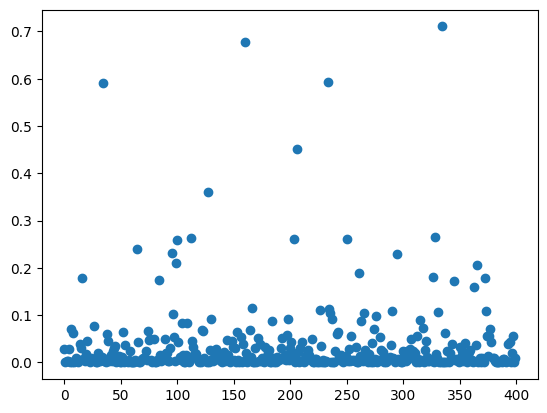

In [93]:
# Extraindo os resíduos
residuos = modelo_final.resid

plt.scatter(range(len(X_treino_clean2)), np.square(residuos))

Como o gráfico não apresenta padrão, podemos concluir que não há heterocedasticidade. Mas vamos apicar um teste estatístico

In [94]:
def valida_sup3(y, x):

    estatisticas = ["F statistic", "p-value"]

    # Teste
    teste_goldfeld = sms.het_goldfeldquandt(y, x)

    resultado = lzip(estatisticas, teste_goldfeld)
    pval = resultado[1][1]

    if pval < 0.05:
        print("Há evidências de heterocedasticidade, a regressão não é homocedástica e rejeitamos a Hipótese Nula")

    else:
        print("Não há evidências de heterocedasticidade, a regressão é provavelmente homocedástica. logo, falhamos em rejeitar a hipótese nula")

In [95]:
valida_sup3(y_treino, X_treino_clean2)

Não há evidências de heterocedasticidade, a regressão é provavelmente homocedástica. logo, falhamos em rejeitar a hipótese nula


### 4 - Normalização de Erros

Normalidade dos termos de erro. Os resíduos devem ser normalmente distribuídos.

Essa suposição pode ser melhor verificada com um histograma ou um Q-Q-plot.

Na regressão linear, a suposição de normalização dos resíduos é a suposição de que os resíduos (erros) da regressão seguem uma distribuição normal.
Isso significa que os resíduos devem ter uma média zero e uma variância constante.

Essa suposição é importante porque alguns testes estatísticos e métodos de estimação de parâmetros pressupõem que os resíduos seguem uma distribuição normal. Se os resíduos não seguirem uma distribuição normal, os resultados desses testes e métodos podem ser imprecisos ou enganosos.

Para verificar se os resíduos seguem uma distribuição normal, você pode plotar um gráfico de resíduos e observar se os resíduos seguem uma distribuição normal. Você também pode usar um teste de normalidade, como o teste de shapiro-wilk, para verificar se os resíduos seguem uma distribuição normal. Se os resíduos não seguirem uma distribuição normal. podemos tentar transformar os dados ou trocar o modelo de regressão.

In [96]:
residuos = modelo_final.resid

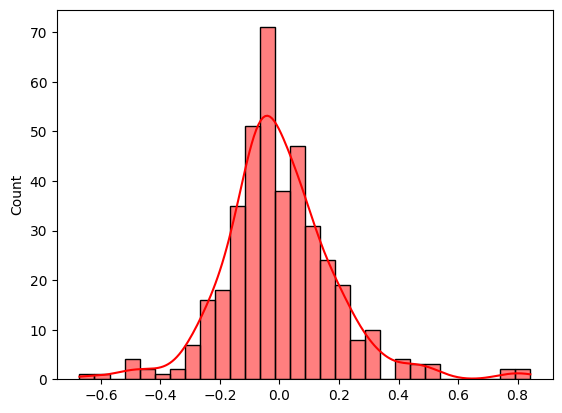

In [97]:
sns.histplot(residuos, kde = True, color = 'red')
plt.show()

Um gráfico QQ (quantile-quantile) é um gráfico que é usado para comparar duas distribuições de dados. Ele é chamado de "qq" porque ele compara os quantis das duas distribuições de dados porque ele compara os quantias das duas distribuições. Os quantis são os valores que dividem os dados em partes iguais. Por exemplo, o primeiro quartil é o valor que dividi os dados em um quarto menor e três quartos maiores.

Para interpretar um gráfico qq, você deve observar se os pontos seguem uma linha diagonal. Se os pontos seguirem uma linha diagonal, isso indica que as duas distribuições são similares. Se os pontos não seguirem uma linha diagonal, isso indica que as duas distribuições são diferentes.

Um gráfico qq é útil para verificar se os dados seguem uma distribuição específica, como a distribuição normal. Se os dados seguirem uma distribuição normal, os pontos no gráfico qq devem seguir uma linha diagonal. Se os pontos não seguirem uma linha diagonal, isso pode indicar que os dados não seguem uma distribuição normal.


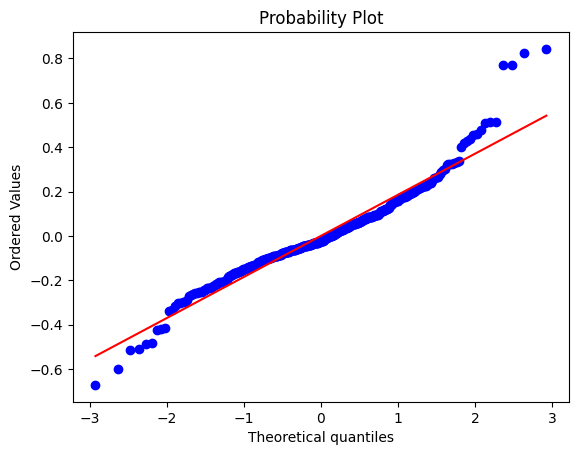

In [98]:
stats.probplot(residuos, dist = "norm", plot = pylab)
plt.show()

Aplicaremos o teste de Shapiro-Vilk aos resíduos para confirmar

Para interpretar o resultado do teste, você pode comparar o valor-p com um nível de significância pré-determinado (0.05)

* Se o valor-p for menor que o nível de significância, rejeitamos a Hipótese Nula, isso indica que há evidências de que os resíduos não seguem uma distribuiçaõ normal.

* Seo valor-p for maior que o nível de significância, falhamos em rejeitar a hipótese nula, isso indica que os resíduos seguem uma distribuição normal

In [99]:
def valida_sup4(residuos):

    from scipy.stats import shapiro

    resultado = shapiro(residuos)

    pval = resultado.pvalue
    print('Valor-p=', pval)


    if pval < 0.05:
        print("Rejeitamos a Hipótese Nula, isso indica que há evidências de que os resíduos não seguem uma distribuição normal")

    else:
        print("Falhamos em rejeitar a Hipótese Nula, isso indica que os resíduos seguem uma distribuição normal")

In [100]:
valida_sup4(residuos)

Valor-p= 1.2627780234325926e-10
Rejeitamos a Hipótese Nula, isso indica que há evidências de que os resíduos não seguem uma distribuição normal


Os resíduos não passaram no teste de normalidade. Provavelmente a diferença é pouca, mas essa suposição não foi satisfeita

Notas:

1 - Nem a variável dependente nem a variável independente precisam ser normalmente distribuídas. Na verdade, elas podem ter todos os tipos de distribuições. A suposição de normalidade se aplica à distribuição dos erros

2 - Às vezes, a não normalidade dos resíduos indica a presença de outliers. 

3 - Pode ser que algumas transformações resolva o problema, porém, tem consequências. Como a interpretação dos coeficientes muda se transformarmos variáveis.

4 - O modelo não se explica corretamente/completamente os dados.

5 - Modelos com overfitting, podem apresentar resídups não normais.



Considerando que o modelo é uma aproximação da realidade, e que não podemos saber a relação exata das variáveis de entradas e saídas. O modelo ainda se torna útil, identificaremos como ele vai perfomar na ultima validação, que no caso é a multicolinearidade.

### Multicolinearidade

In [101]:
def valida_sup5(train):

    vif = pd.DataFrame()

    vif["feature"] = train.columns

    # Calcula o VIF para cada variável
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]

    return vif

In [102]:
print(valida_sup5(df_X_treino))

                                feature       VIF
0   numero_medio_quartos_por_residencia  1.944437
1               idade_media_residencias  3.190144
2                    taxa_criminalidade  1.436394
3                       proporcao_lotes  2.250999
4                    proporcao_empresas  3.289783
5                         rio_no_bairro  1.057753
6                         taxa_poluicao  3.815908
7                      distancia_centro  4.113862
8                      taxa_professores  1.517930
9                 consumo_medio_energia  1.291092
10                    taxa_desabrigados  3.106567


Não há multicolinearidade nos dados.

### Conclusão

O modelo atendeu praticamente a todas as suposições. O ideal seria retornar e tentar ajustar o modelo até satisfazer plenamente a todas as suposições ou considerar se o modelo é bom o suficiente.

Pelo propósito atual, iremos considerar que o modelo é bom o suficiente, pois os gráficos mostraram que estamos muito próximos da normalidade dos resíduos,

In [103]:
#coeficientes
modelo_final.params

const    3.043647
x1       0.082909
x2      -0.082661
x3       0.029659
x4      -0.083773
x5      -0.088921
x6      -0.071510
x7      -0.213070
dtype: float64

In [104]:
dados_param = pd.DataFrame(modelo_final.params)

In [105]:
dados_param

,0
const,3.043647
x1,0.082909
x2,-0.082661
x3,0.029659
x4,-0.083773
x5,-0.088921
x6,-0.071510
x7,-0.213070


In [106]:
colunas = ['const', 
           'numero_medio_quartos_por_residencia',
           'taxa_criminalidade',
           'rio_no_bairro',
           'taxa_poluicao',
           'distancia_centro',
           'taxa_professores',
           'taxa_desabrigados']

In [107]:
novo_df = pd.pivot_table(dados_param, columns = colunas).reset_index()

In [108]:
novo_df

,index,const,distancia_centro,numero_medio_quartos_por_residencia,rio_no_bairro,taxa_criminalidade,taxa_desabrigados,taxa_poluicao,taxa_professores
0,0,3.043647,-0.088921,0.082909,0.029659,-0.082661,-0.21307,-0.083773,-0.07151


O sinal de um coeficiente de regressão linear informa se existe uma correlação positiva ou negativa entre cada variável independente e a variável dependente. Um valor positivo indica que à medida que o valor da variável independente aumentam a média da variável dependente também tende a aumentar. Um valor negativo sugere que, à medida que a variável independente aumenta, a variável dependente tende a diminuir.

O valor do coeficiente significa o quanto a **média** da variável dependente muda, dado um deslocamento de uma unidade da variável independente enquanto mantém outras variáveis no modelo constante. Essa propriedade de mantar as outras variáveis constantes é crucial porque permite avaliar o efeito de cada variável isoladamente das outras.

O modelo de regressão é um modelo linear, onde cada coeficiente representa a mudança esperada na variável dependente para uma unidade de mudança na variável independente correspondente, mantendo todas as outras variáveis constantes.

interpretação de cada coeficiente:

**const (3.043647)**: Este é o intercepto do modelo. Representa o valor esperado da variável dependente quando todas as variáveis independentes são iguais a zero. Na prática, isso pode ou não ter um significado interpretável, dependendo de se faz sentido ou não ter todas as variáveis independentes zeradas.

**distancia_centro (-0.088921)**: Por cada unidade de aumento na distância até o centro, espera-se que a variável dependente diminua em 0.088921 unidades. Isso sugere uma relação negativa entre a distância do centro e a variável dependente.

**numero_medio_quartos_por_residencia (0.082909)**: Um aumento de uma unidade no número médio de quartos por residência está associado a um aumento de 0.082909 unidades na variável dependente. Isso indica uma relação positiva, sugerindo que residências com mais quartos podem ser mais valorizadas.

**rio_no_bairro (0.029659)**: Este coeficiente indica que a presença de um rio no bairro está associada a um aumento de 0.029659 unidades na variável dependente. Como rio_no_bairro é uma variável binária (0 ou 1), então ter um rio no bairro aumenta a variável dependente nessa quantidade.

**taxa_criminalidade (-0.082661)**: Por cada unidade de aumento na taxa de criminalidade, a variável dependente é esperada a diminuir em 0.082661 unidades. Isso sugere uma relação negativa, onde maior criminalidade pode depreciar o valor da variável dependente.

**taxa_desabrigados (-0.21307)**: Uma unidade de aumento na taxa de desabrigados está associada a uma diminuição de 0.21307 unidades na variável dependente, indicando uma forte relação negativa.

**taxa_poluicao (-0.083773)**: Um aumento de uma unidade na taxa de poluição está associado a uma diminuição de 0.083773 unidades na variável dependente, sugerindo que a poluição tem um impacto negativo.

**taxa_professores (-0.07151)**: Por cada unidade de aumento na taxa de professores, espera-se que a variável dependente diminua em 0.07151 unidades. Esse resultado é um pouco contra-intuitivo, já que normalmente esperaríamos uma relação positiva entre a qualidade/quantidade de ensino e o valor da variável dependente. Essa interpretação pode precisar de um exame mais detalhado do contexto ou da forma como a variável "taxa_professores" foi medida ou interpretada no modelo.

Cada coeficiente oferece insights sobre como as variáveis independentes influenciam a variável dependente. No entanto, é importante também considerar a significância estatística de cada coeficiente para determinar se as relações observadas são estatisticamente significativas.


Para verificar as variáveis mais relevantes para prever a variável alvo, "taxa_ocupacao_log", no modelo de regressão linear, consideramos os seguintes aspectos do sumário do modelo:

1. Coeficientes (coef) e sua Significância (P>|t|):

Coeficientes (coef): Indicam o efeito esperado na variável dependente (taxa_ocupacao_log) para uma unidade de mudança na variável independente, mantendo as outras constantes. Valores mais altos (em magnitude absoluta) sugerem um impacto maior.

P>|t| (p-valor): Fornece a probabilidade de que o coeficiente seja igual a zero (nenhuma relação). Um valor abaixo de 0.05 é comumente considerado estatisticamente significativo, indicando que há evidências suficientes para afirmar que há uma relação entre a variável independente e a variável dependente.

2. Intervalos de Confiança ([0.025 0.975]):

Os intervalos de confiança mostram a faixa dentro da qual o verdadeiro coeficiente é esperado estar com 95% de confiança. Variáveis com intervalos que não incluem 0 têm uma relação significativa com a variável dependente.

Avaliando a Relevância das Variáveis:

Variáveis com p-valor baixo (< 0.05) são estatisticamente significativas e consideradas relevantes para o modelo. 

Em nosso caso, todas as variáveis, incluindo x1 a x7, são estatisticamente significativas para prever a taxa_ocupacao_log, pois todos os valores-p são menores que 0.05.

Magnitude dos coeficientes: A relevância também pode ser avaliada pela magnitude dos coeficientes (ignorando o sinal). Por exemplo, x7 (-0.2131) tem um impacto maior na taxa_ocupacao_log do que outras variáveis, dado o tamanho do seu coeficiente.

## Respondendo a Pergunta de Negócio:

Com base nos critérios acima, podemos determinar que todas as variáveis (x1 a x7) são relevantes para o modelo. Essas variáveis correspondem a:

- numero_medio_quartos_por_residencia
- taxa_criminalidade
- rio_no_bairro
- taxa_poluicao
- distancia_centro
- taxa_professores
- taxa_desabrigados

Essas variáveis são determinantes para explicar a taxa de ocupação, de acordo com a análise dos dados fornecidos.

A equação final ficou:


$$
Y = 3.043647 - 0.088921 \cdot X_1 + 0.082909 \cdot X_2 + 0.029659 \cdot X_3 - 0.082661 \cdot X_4 - 0.21307 \cdot X_5 - 0.083773 \cdot X_6 - 0.07151 \cdot X_7
$$


- \( Y \) é a Taxa de Ocupação.
- \( X_1 \) = distância do centro.
- \( X_2 \) = número médio de quartos por residência.
- \( X_3 \) = presença de um rio no bairro (0 ou 1).
- \( X_4 \) = taxa de criminalidade.
- \( X_5 \) = taxa de desabrigados.
- \( X_6 \) = taxa de poluição.
- \( X_7 \) = taxa de professores.


